<a href="https://colab.research.google.com/github/VintageGold/Text_Summarization/blob/main/Text_Summarization_liang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import json
import pandas as pd
import string
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from  vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Load Data

In [3]:
df_metadata = pd.read_csv('/content/gdrive/My Drive/Text_Summarization/Telehealth_article.csv')

# Clean Data
1.   Lowercase
2.   Remove Punctuation
3.   White Spaces



In [4]:
def clean_text(text,lowercase=True):
    
    corpus =  text
    
    if lowercase:
        corpus = text.lower()

    translator = str.maketrans("","",string.punctuation + "\n" + "\tb")
    
    clean_corpus = corpus.translate(translator)
    
    remove_extra_whitespaces = [token.strip() for token in clean_corpus.split()]

    return ' '.join(remove_extra_whitespaces)

In [5]:
df_metadata['Content_Clean'] = df_metadata['Content'].apply(lambda text: clean_text(text))
df_metadata['Content_Length'] = df_metadata['Content_Clean'].apply(lambda text: len(text))
df_metadata['Abstract_Length'] = df_metadata['Abstract'].apply(lambda text: len(str(text)))
df_metadata["Parsed_Keywords"] = df_metadata["Keywords"].apply(lambda keywords: str(keywords).replace("\n\n"," ").split(" ")[1:])
df_metadata['Parsed_Keywords_Length'] = df_metadata['Parsed_Keywords'].apply(lambda text: len(text))

In [6]:
df_metadata.to_csv('/content/gdrive/My Drive/Text_Summarization/Telehealth_article_1.csv')

In [7]:
df_metadata.head()

,Unnamed: 0,Index,Journal Title,Article Title,Date Published,Authors,Abstract,Keywords,Citation,Content,Content_Clean,Content_Length,Abstract_Length,Parsed_Keywords,Parsed_Keywords_Length
0,0,1,Psychological Servies,The Effectiveness of Telepsychology With Veter...,2021,Michael J. McClellan; Richard Osbaldiston; Ron...,Veterans face a variety of stressors due to th...,"KEYWORDS:\n\ntelepsychology, meta-analysis, ve...","McClellan, M. J., Osbaldiston, R., Wu, R., Yea...",Veterans face a variety of stressors related t...,veterans face a variety of stressors related t...,35996,2411,"[telepsychology,, meta-analysis,, veteran,, vi...",5
1,1,2,"Psychology, Public Policy, and Law",Making the Case for Videoconferencing and Remo...,2021,Milfred D. Dale; Desiree Smith,The COVID-19 pandemic and its requirements for...,"KEYWORDS:\n\nremote child custody evaluations,...","Dale, M. D., & Smith, D. (2021). Making the ca...",The impact of the COVID-19 pandemic on the chi...,the impact of the covid19 pandemic on the chil...,71152,1577,"[remote, child, custody, evaluations,, videoco...",10
2,2,3,"Psychology, Public Policy, and Law","Forensic E-Mental Health: Review, Research Pri...",2021,Lauren E. Kois; Jennifer Cox; Ashley T. Peck,Forensic e-mental health is an area of psychol...,"KEYWORDS:\n\nforensic e-mental health, telehea...","Kois, L. E., Cox, J., & Peck, A. T. (2021). Fo...","In November 2019, COVID-19—the infectious, hig...",in novemer 2019 covid19—the infectious highly ...,60855,1842,"[forensic, e-mental, health,, telehealth,, tel...",8
3,3,4,Training and Education in Professional Psychology,Moving Toward a New Era of Telepsychology in U...,2021,Allison L. Baier; Sarah Danzo,Many university training clinics are facing nu...,"KEYWORDS:\n\neducation and training, telepsych...","Baier, A. L., & Danzo, S. (2021). Moving towar...",Anxiety and depressive disorders are among the...,anxiety and depressive disorders are among the...,29089,1650,"[education, and, training,, telepsychology,, C...",6
4,4,5,Practice Innovations,Navigating Changes in the Physical and Psychol...,2021,Liat Shklarski; Allison Abrams; Elana Bakst,The emergence of the Covid-19 pandemic at the ...,"KEYWORDS:\n\nremote psychotherapy, Covid-19, p...","Shklarski, L., Abrams, A., & Bakst, E. (2021)....","In mid-March, 2020, the authors—as well as the...",in midmarch 2020 the authors—as well as the ma...,40983,1871,"[remote, psychotherapy,, Covid-19,, pandemic,,...",6


In [8]:
df_metadata.dtypes

Unnamed: 0                 int64
Index                      int64
Journal Title             object
Article Title             object
Date Published             int64
Authors                   object
Abstract                  object
Keywords                  object
Citation                  object
Content                   object
Content_Clean             object
Content_Length             int64
Abstract_Length            int64
Parsed_Keywords           object
Parsed_Keywords_Length     int64
dtype: object

## Use VaderSentiment to get the polarity of the sentiment analysis.

In [9]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 12.6MB/s 


In [10]:
def vader_sentiment_scores(text): 
  
    # Define SentimentIntensityAnalyzer object of VADER. 
    SIA_obj = SentimentIntensityAnalyzer() 
  
    # calculate polarity scores which gives a sentiment dictionary, 
    # Contains pos, neg, neu, and compound scores.
 
    polarity_dict = SIA_obj.polarity_scores(text) 
      
    #print("Raw sentiment dictionary : ", polarity_dict) 
    #print("polarity percentage of sentence ", polarity_dict['neg']*100, "% :: Negative") 
    #print("polarity percentage of sentence ", polarity_dict['neu']*100, "% :: Neutral") 
    #print("polarity percentage of sentence ", polarity_dict['pos']*100, "% :: Positive") 
  
    print("Overall polarity percentage of sentence", end = " : ") 
  
    # Calculate overall sentiment by compound score
    if polarity_dict['compound'] >= 0.05 : 
        print("Positive")
        return "Positive"
  
    elif polarity_dict['compound'] <= - 0.05 : 
        print("Negative") 
        return "Negative"
    else : 
        print("Neutral")
        return "Neutral"

In [11]:
df_metadata['Content_Clean'][1].lower()

'the impact of the covid19 pandemic on the child custody evaluation cce community has een astounding and immediate in march april and may of 2020 state and local governments and courts egan issuing safeathome and social distancing proclamations provision of inperson mental health services was discouraged as unsafe chenneville schwartzmette 2020 these pronouncements required evaluators to quickly learn what technology could e used and how to use it to finish incomplete evaluations or meet the demands of court orders for new evaluations while the capaility of providing ehavioral health services with telecommunication technologies has een extended to virtually all clinical aspects of ehavioral and mental health practice such as assessment consultation psychoeducation and treatment luxton nelson maheu 2016 utilizing these technologies in parenting plan evaluations had not een a serious topic prior to the covid19 pandemic that has changed this article examines the feasiility of remote child

In [12]:
import nltk
nltk.download('vader_lexicon')

for i in range(len(df_metadata)) :
  
    sentiment = vader_sentiment_scores(df_metadata.loc[i, "Content_Clean"])
    print(sentiment)
    df_metadata.loc[i, "Sentiments"] = sentiment

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
Overall polarity percentage of sentence : Negative
Negative
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of sentence : Positive
Positive
Overall polarity percentage of s

In [13]:
df_metadata.head()

,Unnamed: 0,Index,Journal Title,Article Title,Date Published,Authors,Abstract,Keywords,Citation,Content,Content_Clean,Content_Length,Abstract_Length,Parsed_Keywords,Parsed_Keywords_Length,Sentiments
0,0,1,Psychological Servies,The Effectiveness of Telepsychology With Veter...,2021,Michael J. McClellan; Richard Osbaldiston; Ron...,Veterans face a variety of stressors due to th...,"KEYWORDS:\n\ntelepsychology, meta-analysis, ve...","McClellan, M. J., Osbaldiston, R., Wu, R., Yea...",Veterans face a variety of stressors related t...,veterans face a variety of stressors related t...,35996,2411,"[telepsychology,, meta-analysis,, veteran,, vi...",5,Negative
1,1,2,"Psychology, Public Policy, and Law",Making the Case for Videoconferencing and Remo...,2021,Milfred D. Dale; Desiree Smith,The COVID-19 pandemic and its requirements for...,"KEYWORDS:\n\nremote child custody evaluations,...","Dale, M. D., & Smith, D. (2021). Making the ca...",The impact of the COVID-19 pandemic on the chi...,the impact of the covid19 pandemic on the chil...,71152,1577,"[remote, child, custody, evaluations,, videoco...",10,Positive
2,2,3,"Psychology, Public Policy, and Law","Forensic E-Mental Health: Review, Research Pri...",2021,Lauren E. Kois; Jennifer Cox; Ashley T. Peck,Forensic e-mental health is an area of psychol...,"KEYWORDS:\n\nforensic e-mental health, telehea...","Kois, L. E., Cox, J., & Peck, A. T. (2021). Fo...","In November 2019, COVID-19—the infectious, hig...",in novemer 2019 covid19—the infectious highly ...,60855,1842,"[forensic, e-mental, health,, telehealth,, tel...",8,Positive
3,3,4,Training and Education in Professional Psychology,Moving Toward a New Era of Telepsychology in U...,2021,Allison L. Baier; Sarah Danzo,Many university training clinics are facing nu...,"KEYWORDS:\n\neducation and training, telepsych...","Baier, A. L., & Danzo, S. (2021). Moving towar...",Anxiety and depressive disorders are among the...,anxiety and depressive disorders are among the...,29089,1650,"[education, and, training,, telepsychology,, C...",6,Positive
4,4,5,Practice Innovations,Navigating Changes in the Physical and Psychol...,2021,Liat Shklarski; Allison Abrams; Elana Bakst,The emergence of the Covid-19 pandemic at the ...,"KEYWORDS:\n\nremote psychotherapy, Covid-19, p...","Shklarski, L., Abrams, A., & Bakst, E. (2021)....","In mid-March, 2020, the authors—as well as the...",in midmarch 2020 the authors—as well as the ma...,40983,1871,"[remote, psychotherapy,, Covid-19,, pandemic,,...",6,Positive


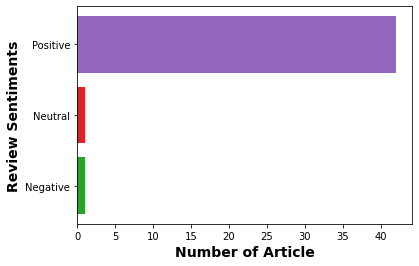

In [14]:
Sentiment_count=df_metadata.groupby('Sentiments').count()
plt.barh(Sentiment_count.index.values, Sentiment_count['Article Title'], color=['C2', 'C3', 'C4'])
plt.ylabel('Review Sentiments',fontweight= 'bold', fontsize = '14')
plt.xlabel('Number of Article', fontweight= 'bold', fontsize = '14')
plt.show()

## Use TextBlob to analysis polarity and subjectivity of sentiment analysis.

In [15]:
# Create new df columns based on Polarity and Subjectivity of the texts.
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_metadata['Polarity'] = df_metadata['Content_Clean'].apply(pol)
df_metadata['Subjectivity'] = df_metadata['Content_Clean'].apply(sub)
df_metadata.head()

,Unnamed: 0,Index,Journal Title,Article Title,Date Published,Authors,Abstract,Keywords,Citation,Content,Content_Clean,Content_Length,Abstract_Length,Parsed_Keywords,Parsed_Keywords_Length,Sentiments,Polarity,Subjectivity
0,0,1,Psychological Servies,The Effectiveness of Telepsychology With Veter...,2021,Michael J. McClellan; Richard Osbaldiston; Ron...,Veterans face a variety of stressors due to th...,"KEYWORDS:\n\ntelepsychology, meta-analysis, ve...","McClellan, M. J., Osbaldiston, R., Wu, R., Yea...",Veterans face a variety of stressors related t...,veterans face a variety of stressors related t...,35996,2411,"[telepsychology,, meta-analysis,, veteran,, vi...",5,Negative,0.080116,0.418593
1,1,2,"Psychology, Public Policy, and Law",Making the Case for Videoconferencing and Remo...,2021,Milfred D. Dale; Desiree Smith,The COVID-19 pandemic and its requirements for...,"KEYWORDS:\n\nremote child custody evaluations,...","Dale, M. D., & Smith, D. (2021). Making the ca...",The impact of the COVID-19 pandemic on the chi...,the impact of the covid19 pandemic on the chil...,71152,1577,"[remote, child, custody, evaluations,, videoco...",10,Positive,0.094999,0.425968
2,2,3,"Psychology, Public Policy, and Law","Forensic E-Mental Health: Review, Research Pri...",2021,Lauren E. Kois; Jennifer Cox; Ashley T. Peck,Forensic e-mental health is an area of psychol...,"KEYWORDS:\n\nforensic e-mental health, telehea...","Kois, L. E., Cox, J., & Peck, A. T. (2021). Fo...","In November 2019, COVID-19—the infectious, hig...",in novemer 2019 covid19—the infectious highly ...,60855,1842,"[forensic, e-mental, health,, telehealth,, tel...",8,Positive,0.042005,0.392394
3,3,4,Training and Education in Professional Psychology,Moving Toward a New Era of Telepsychology in U...,2021,Allison L. Baier; Sarah Danzo,Many university training clinics are facing nu...,"KEYWORDS:\n\neducation and training, telepsych...","Baier, A. L., & Danzo, S. (2021). Moving towar...",Anxiety and depressive disorders are among the...,anxiety and depressive disorders are among the...,29089,1650,"[education, and, training,, telepsychology,, C...",6,Positive,0.105784,0.447756
4,4,5,Practice Innovations,Navigating Changes in the Physical and Psychol...,2021,Liat Shklarski; Allison Abrams; Elana Bakst,The emergence of the Covid-19 pandemic at the ...,"KEYWORDS:\n\nremote psychotherapy, Covid-19, p...","Shklarski, L., Abrams, A., & Bakst, E. (2021)....","In mid-March, 2020, the authors—as well as the...",in midmarch 2020 the authors—as well as the ma...,40983,1871,"[remote, psychotherapy,, Covid-19,, pandemic,,...",6,Positive,0.114111,0.454020


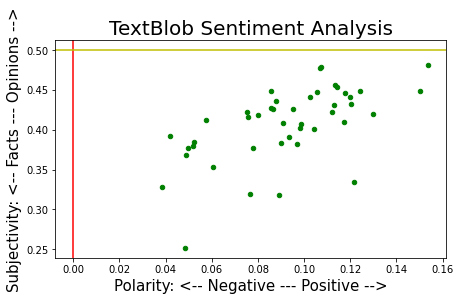

In [16]:
import matplotlib.pyplot as plt

df_metadata.plot.scatter(x ='Polarity', y ='Subjectivity', color = 'green', figsize =[7, 4])    
plt.title('TextBlob Sentiment Analysis', fontsize=20)
plt.xlabel('Polarity: <-- Negative --- Positive -->', fontsize=15)
plt.ylabel('Subjectivity: <-- Facts --- Opinions -->', fontsize=15)
plt.axvline(0.0, color = 'r')
plt.axhline(0.5, color = 'y')
    
plt.show()

In [17]:
df_metadata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,44.0,21.500000,12.845233,0.000000,10.750000,21.500000,32.250000,43.000000
Index,44.0,22.500000,12.845233,1.000000,11.750000,22.500000,33.250000,44.000000
Date Published,44.0,2019.522727,1.171138,2017.000000,2019.000000,2020.000000,2020.000000,2021.000000
Content_Length,44.0,32601.363636,14295.429224,6070.000000,21850.500000,33255.000000,41508.500000,71152.000000
Abstract_Length,44.0,1568.454545,716.846208,3.000000,1355.500000,1693.000000,1982.000000,2570.000000
Parsed_Keywords_Length,44.0,6.909091,2.648547,0.000000,5.000000,7.000000,8.250000,12.000000
Polarity,44.0,0.092445,0.028031,0.038392,0.076284,0.094168,0.113028,0.153801
Subjectivity,44.0,0.407579,0.047159,0.251543,0.382971,0.417098,0.440928,0.481024


## keywords

In [18]:
keyword_list = [word for word in df_metadata['Parsed_Keywords'][:]]
keyword_list. 

SyntaxError: ignored

In [ ]:
keyword_new = []
for word in keyword_list:
  keyword_new.extend(word)

In [ ]:
keyword_new

In [ ]:
keyword_new_2 = [i.replace(i, re.sub(r'\W', '', i)) for i in keyword_new]

In [ ]:
keyword_new_2

In [ ]:
keyword_new_3 = [set(keyword_new_2)]

In [ ]:
keyword_new_3

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
import nltk
#from nltk import word_tokenize
from nltk.stem import	WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
#for w in keyword_new_2:
	  #wordnet_lemmatizer.lemmatize(w)

In [ ]:
keyword_new_3 = [wordnet_lemmatizer.lemmatize(w) for w in keyword_new_2]

In [ ]:
len(keyword_new_3)

In [ ]:
len(set(keyword_new_3))

In [ ]:
set(keyword_new_3)

## Kmeans to determine clustering optimal number.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(df_metadata['Content_Clean'])

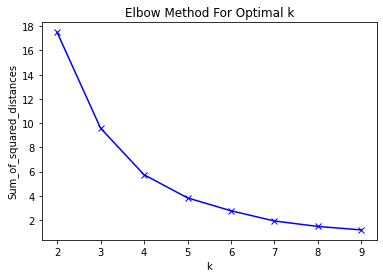

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
  km = KMeans(n_clusters=k, max_iter=200, n_init=10)
  km = km.fit(X.reshape(-1,1))
  Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Generate document term matrix by using scikit-learn's CountVectorizer.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.corpus import stopwords
from nltk import word_tokenize
from textblob import TextBlob

In [22]:
token= RegexpTokenizer(r'\w+')

cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize )
text_counts= cv.fit_transform(df_metadata['Content_Clean'])

print(cv.vocabulary_)

{'veterans': 13688, 'face': 4884, 'variety': 13637, 'stressors': 12221, 'related': 10583, 'military': 7989, 'service': 11506, 'institute': 6523, 'medicine': 7875, '2014': 357, 'tanielian': 12582, 'et': 4606, 'al': 1287, '2008': 293, 'return': 10878, 'conflict': 2784, 'mental': 7904, 'health': 5814, 'condition': 2742, 'ut': 13566, 'experience': 4782, 'period': 9260, 'readjustment': 10352, 'reintegrate': 10575, 'life': 7364, 'family': 4958, 'friends': 5310, 'community': 2574, 'sustance': 12461, 'ause': 1866, 'services': 11508, 'administration': 1120, 'samhsa': 11160, '2012': 328, 'p': 8991, '1': 52, 'individuals': 6386, 'juggle': 6953, 'conflicting': 2786, 'militaryrelated': 7990, 'responsiilities': 10822, 'learn': 7254, 'readjust': 10351, 'environments': 4514, 'ehaviors': 4217, 'associated': 1759, 'constant': 2881, 'state': 12093, 'readiness': 10348, 'longer': 7511, 'needed': 8331, 'process': 9864, 'comatrelated': 2516, 'exposure': 4830, 'collectively': 2498, 'contriute': 2975, 'prolems

In [23]:
# print the count of each number assign to each word
print(text_counts)

  (0, 13688)	47
  (0, 4884)	2
  (0, 13637)	5
  (0, 12221)	1
  (0, 10583)	6
  (0, 7989)	3
  (0, 11506)	4
  (0, 6523)	2
  (0, 7875)	2
  (0, 357)	6
  (0, 12582)	8
  (0, 4606)	50
  (0, 1287)	50
  (0, 293)	9
  (0, 10878)	1
  (0, 2784)	4
  (0, 7904)	30
  (0, 5814)	34
  (0, 2742)	7
  (0, 13566)	5
  (0, 4782)	4
  (0, 9260)	2
  (0, 10352)	1
  (0, 10575)	1
  (0, 7364)	2
  :	:
  (43, 566)	1
  (43, 2746)	1
  (43, 7197)	1
  (43, 7066)	2
  (43, 325)	1
  (43, 9086)	1
  (43, 13072)	1
  (43, 14083)	1
  (43, 13579)	1
  (43, 11957)	1
  (43, 2080)	1
  (43, 2596)	1
  (43, 4383)	1
  (43, 7074)	1
  (43, 8982)	1
  (43, 7864)	1
  (43, 12608)	2
  (43, 1466)	1
  (43, 6323)	1
  (43, 3915)	1
  (43, 3760)	1
  (43, 390)	1
  (43, 13959)	1
  (43, 9736)	1
  (43, 13514)	1


## TF-IDF transformation

In [24]:
# Transform a count matrix to a normalized  tf-idf representation
# tf-idf(Term Frequency - Inverse Document-Frequency ) helps to know the most significant words in a document
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(text_counts)
print(tfidf_transformer,"\n")

reviews_tfidf = tfidf_transformer.transform(text_counts)
print(reviews_tfidf)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True) 

  (0, 14212)	0.007964182023835439
  (0, 14173)	0.005066811336730938
  (0, 14164)	0.07223805306903215
  (0, 14116)	0.00852002532389917
  (0, 14109)	0.010246632317483285
  (0, 14093)	0.010246632317483285
  (0, 14066)	0.01747278578719925
  (0, 14055)	0.0062375750302513236
  (0, 14026)	0.010756246050544241
  (0, 14015)	0.010246632317483285
  (0, 14007)	0.02049326463496657
  (0, 13971)	0.005584034214388559
  (0, 13945)	0.006500024634439967
  (0, 13924)	0.15369948476224926
  (0, 13916)	0.005399433675585837
  (0, 13898)	0.004773417640855851
  (0, 13888)	0.02049326463496657
  (0, 13885)	0.01050290307581282
  (0, 13825)	0.015928364047670878
  (0, 13824)	0.006000160484502226
  (0, 13805)	0.010455149371043446
  (0, 13791)	0.00852002532389917
  (0, 13767)	0.015200434010192818
  (0, 13730)	0.006000160484502226
  (0, 13729)	0.004915797383349366
  :	:
  (43, 282)	0.005022348895390053
  (43, 258)	0.006654548830486509
  (4

In [25]:
print(reviews_tfidf.shape)

(44, 14255)


Multinomial Naive Bayes model

Countervectorezie and TF-IDF vectorzation accuary comparasion.

In [26]:
# Multinomial Naive Bayes Algorithm – It is used to classify on words occurrence.
model = MultinomialNB().fit(reviews_tfidf, df_metadata['Sentiments'])

In [27]:
# Predict by model
all_predictions = model.predict(reviews_tfidf)
print(all_predictions)

['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive']


In [43]:
### Let's split dataset  for TF-IDF vectorization. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
reviews_tfidf, df_metadata['Sentiments'], test_size=0.3, random_state=44)

In [44]:
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.9285714285714286


In [30]:
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix(df_metadata['Sentiments'], all_predictions )

array([[ 0,  0,  1],
       [ 0,  0,  1],
       [ 0,  0, 42]])

In [31]:
print(classification_report(df_metadata['Sentiments'], all_predictions))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.00      0.00      0.00         1
    Positive       0.95      1.00      0.98        42

    accuracy                           0.95        44
   macro avg       0.32      0.33      0.33        44
weighted avg       0.91      0.95      0.93        44



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
### Let's split dataset  for CountVectorizerized. 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df_metadata['Sentiments'], test_size=0.3, random_state=50)

In [48]:
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 1.0


## key topic 

In [34]:
import numpy as np
from sklearn.decomposition import NMF
idx_to_word = np.array(cv.get_feature_names())

nmf = NMF(n_components=20, solver="mu")
W = nmf.fit_transform(text_counts)
H = nmf.components_
# print the topics
for i, topic in enumerate(H):
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word [topic.argsort()[-10:]]])))

Topic 1: interventions,2020,care,use,y,treatment,health,e,al,et
Topic 2: states,training,using,e,pandemic,services,use,practice,psychologists,telepsychology
Topic 3: virtual,telephone,rural,video,services,vha,telemental,mental,care,health
Topic 4: information,data,professional,records,technology,practice,client,health,clients,e
Topic 5: provider,experience,use,articles,care,studies,attitudes,patients,providers,tmhv
Topic 6: covid19,research,transition,clients,supervisors,e,clinic,trainees,clinics,training
Topic 7: spoke,treatment,nyh,clinical,veteran,services,va,veterans,hu,tmh
Topic 8: evaluation,individuals,practice,research,et,al,mental,emental,forensic,health
Topic 9: assessment,s,interviews,use,evaluator,children,data,child,evaluators,vc
Topic 10: 2020,s,therapists,participant,work,therapy,remote,pandemic,clients,participants
Topic 11: sizes,services,study,videoconferencing,mental,depression,ftf,veterans,effect,studies
Topic 12: coaching,knowledge,study,tutorial,skill,participants

### word cloud

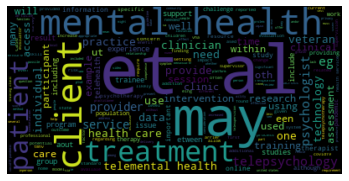

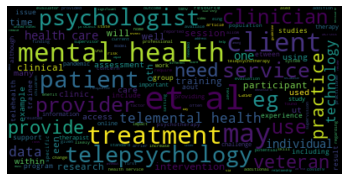

In [35]:
from os import path
from wordcloud import WordCloud
#d = path.dirname("/content/gas_clean.txt"
# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(df_metadata['Content_Clean'].values))
# Display the generated image:
# the matplotlib way:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(df_metadata['Content_Clean'].values))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Freqentcy distribution for words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



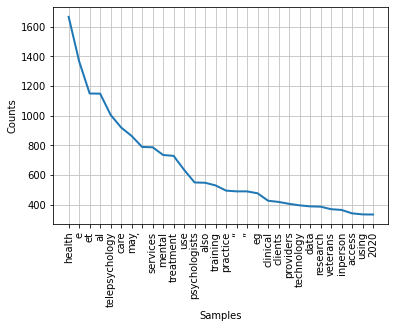

In [36]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english')) 
  
tokenized_word=word_tokenize(' '.join(df_metadata['Content_Clean'].values))
  
filtered_sentence = [w for w in tokenized_word if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in tokenized_word: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  
print(tokenized_word) 
print(filtered_sentence) 

# Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(filtered_sentence)
print(fdist)

# Ten most common words
fdist.most_common(10)

# Frequency Distribution Plots
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

#Similarity analysis

In [37]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [38]:
text_1 = nlp(df_metadata['Content_Clean'].values[0])
text_2 = nlp(df_metadata['Content_Clean'].values[2])
text_sim = text_1.similarity(text_2)
text_sim

/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.975787726163072

In [39]:
similarity_array = np.zeros(shape=(len(df_metadata['Content_Clean']), len(df_metadata['Content_Clean'])))

In [40]:
for i in range(len(df_metadata['Content_Clean'])):          
    for j in range(len(df_metadata['Content_Clean'])):
        similarity_array[i][j] = nlp(df_metadata['Content_Clean'].values[i]).similarity(nlp(df_metadata['Content_Clean'].values[j]))

/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if

In [ ]:
import pickle

In [ ]:
with open("similarity_matrix.data", "wb") as f:
  pickle.dump(similarity_array, f)

In [ ]:
pairwise_similarity = reviews_tfidf * reviews_tfidf.T 

In [ ]:
pairwise_similarity = pairwise_similarity.data.reshape(44, 44)

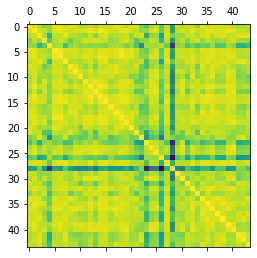

In [ ]:
#https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
plt.matshow(similarity_array)

In [ ]:
import seaborn as sns

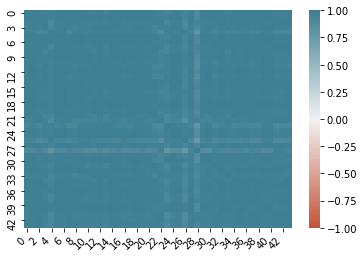

In [ ]:
ax = sns.heatmap(
    similarity_array, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(dt[0], dt[1])
len(more_sentences)
pd.DataFrame(cosine_similarity(dt, dt))

PDF.  FastText for Semantic Similarity